In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
#import librarires

import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16


<ipython-input-3-a8e1b4a0a2de>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers


In [ ]:
!pip install tensorflow-hub


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import InceptionV3


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input

from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    fill_mode='nearest',
    brightness_range = (0.5, 1.5),
)

batch_size = 32

# Load and preprocess data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/mmds4/mmds/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',shuffle=True,seed=1
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/mmds4/mmds/valid',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',shuffle=True,seed=1
)

test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/mmds4/mmds/test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',shuffle=True,seed=1
)


Found 924 images belonging to 2 classes.
Found 215 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [ ]:
class_names = ["plain","pothole"]
for i in range(len(class_names)):
    print(i," ",class_names[i])

0   plain
1   pothole


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load DenseNet121 model pre-trained on ImageNet data
densenet_model = DenseNet121(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Freeze the pretrained layers
for layer in densenet_model.layers:
    layer.trainable = False

# Adding custom classification layers
model = models.Sequential([
    densenet_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(2, activation='softmax')  # Assuming 2 classes
])

# Model summary
model.summary()

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,  # You can change the number of epochs based on your requirement
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

29084464/29084464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                         

Epoch 1/20
21/28 [=====================>........] - ETA: 1:15 - loss: 0.5051 - accuracy: 0.8571

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


28/28 [==============================] - 510s 18s/step - loss: 0.4781 - accuracy: 0.8722 - val_loss: 0.2707 - val_accuracy: 0.9583
Epoch 2/20
28/28 [==============================] - 29s 1s/step - loss: 0.3125 - accuracy: 0.9540 - val_loss: 0.2388 - val_accuracy: 0.9740
Epoch 3/20
28/28 [==============================] - 32s 1s/step - loss: 0.2774 - accuracy: 0.9529 - val_loss: 0.2400 - val_accuracy: 0.9531
Epoch 4/20
28/28 [==============================] - 28s 1s/step - loss: 0.2839 - accuracy: 0.9574 - val_loss: 0.3329 - val_accuracy: 0.9479
Epoch 5/20
28/28 [==============================] - 32s 1s/step - loss: 0.2394 - accuracy: 0.9686 - val_loss: 0.2378 - val_accuracy: 0.9740
Epoch 6/20
28/28 [==============================] - 30s 1s/step - loss: 0.2497 - accuracy: 0.9686 - val_loss: 0.2592 - val_accuracy: 0.9740
Epoch 7/20
28/28 [==============================] - 27s 993ms/step - loss: 0.2205 - accuracy: 0.9809 - val_loss: 0.2123 - val_accuracy: 0.9688
Epoch 8/20
28/28 [========

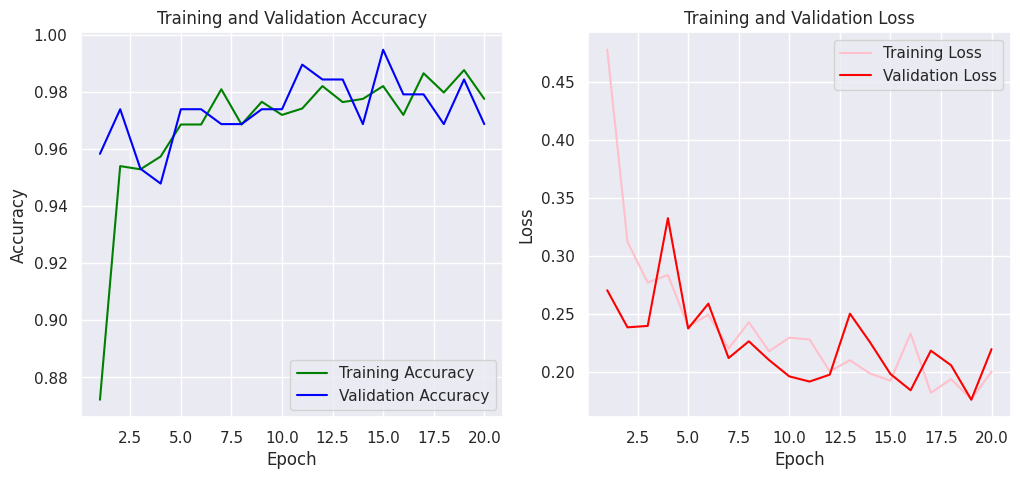

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'green', label='Training Accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'pink', label='Training Loss')
plt.plot(epochs, val_loss, 'red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def visualize_predictions(classifier, n_cases, class_names):
    for i in range(n_cases):
        path = random.choice(['/content/drive/MyDrive/mmds4/mmds/test/test_plain', '/content/drive/MyDrive/mmds4/mmds/test/test_pothole'])

        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(224, 224))
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor = preprocess_input(img_tensor)  # Make sure to match the preprocessing of VGG16

        prediction = classifier.predict(img_tensor)
        prediction = np.argmax(prediction, axis=1)

        plt.imshow(img)
        plt.show()

        print(f"Predicted: {class_names[prediction[0]]}")

# Example usage, assuming class_names are defined (e.g., class_names = ['Plain', 'Pothole'])
visualize_predictions(model, 50, ['Plain', 'Pothole'])


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from keras.applications.vgg16 import preprocess_input

def gather_predictions(classifier, test_dir, n_cases, class_names):
    predictions = []
    true_labels = []

    for _ in range(n_cases):
        for class_index, class_name in enumerate(class_names):
            path = os.path.join(test_dir, class_name.lower())
            random_img = random.choice(os.listdir(path))
            img_path = os.path.join(path, random_img)
            img = image.load_img(img_path, target_size=(244, 244))
            img_tensor = image.img_to_array(img)
            img_tensor = np.expand_dims(img_tensor, axis=0)
            img_tensor = preprocess_input(img_tensor)

            pred = classifier.predict(img_tensor)
            pred_class = np.argmax(pred, axis=1)[0]

            predictions.append(pred_class)
            true_labels.append(class_index)  # Assumes directories are named after class names

    return true_labels, predictions

# Example usage
true_labels, predictions = gather_predictions(model, '/content/drive/MyDrive/mmds4/mmds/test', 130, ['test_Plain', 'test_Pothole'])


1/1 [==============================] - 0s 38ms/step


Precision: 0.8467153284671532
Recall: 0.8923076923076924
F1 Score: 0.8689138576779026
Accuracy: 0.8653846153846154


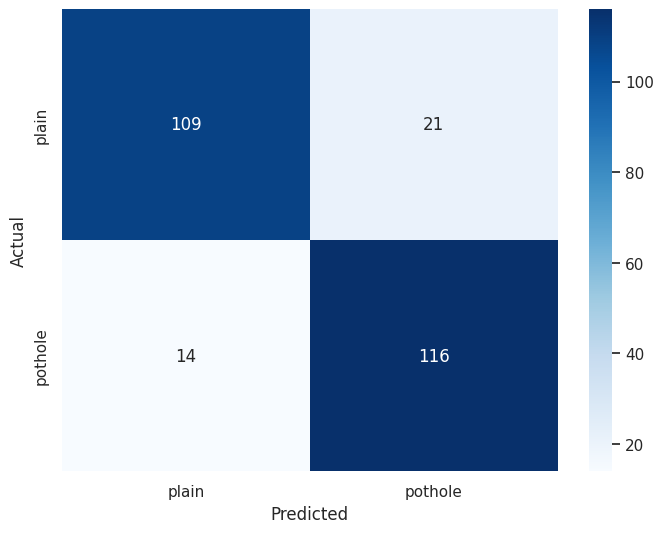

In [ ]:
# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)
accuracy = accuracy_score(true_labels, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Generate and display a confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
